<a href="https://colab.research.google.com/github/202204417/25-2-DIP-202204417/blob/main/HW03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
imgpath = '/content/drive/MyDrive/class/DIP1/DIP4E'
#os.listdir(imgpath)

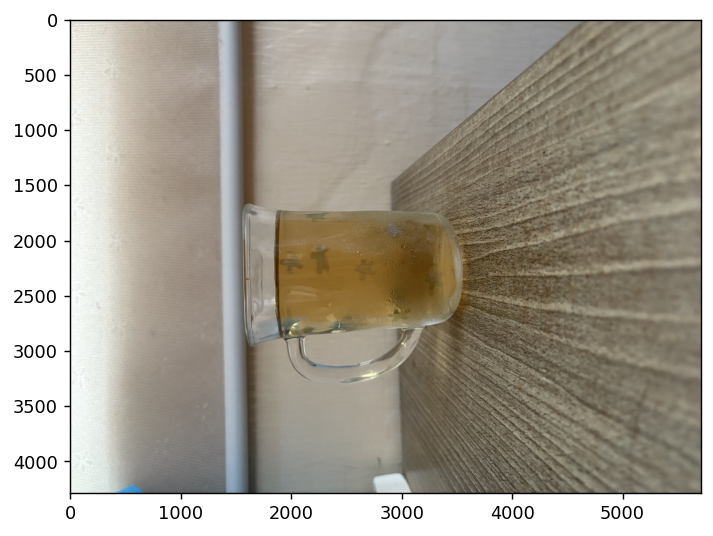

In [ ]:
img1 = plt.imread('/content/before.jpg')

plt.figure(dpi=128)
plt.imshow(img1, cmap='gray')
plt.show()

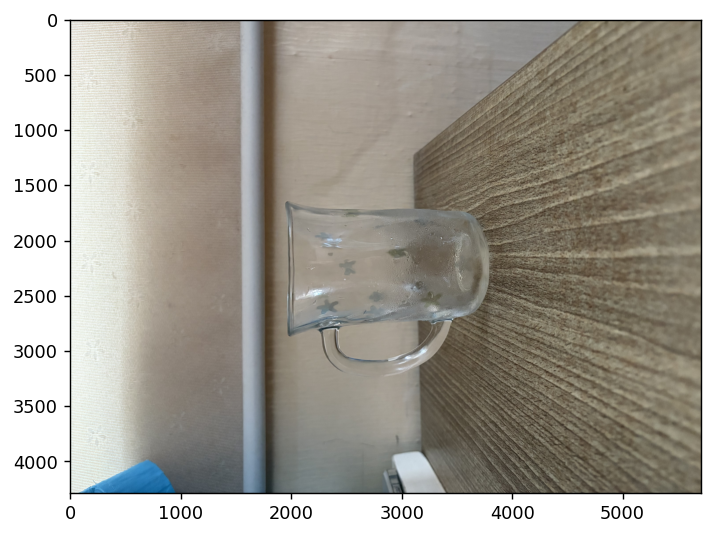

In [ ]:
img2 = plt.imread('/content/after.jpg')

plt.figure(dpi=128)
plt.imshow(img2, cmap='gray')
plt.show()

## subtraction

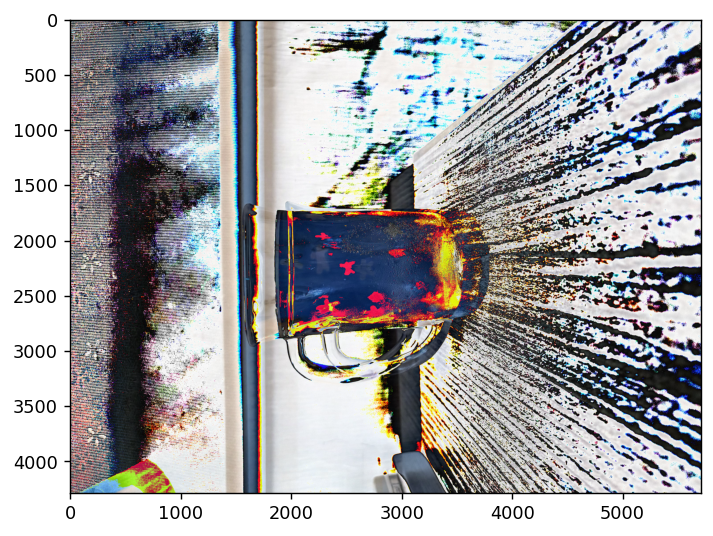

In [ ]:
plt.figure(dpi=128)
plt.imshow(img2-img1, cmap='gray')
plt.show()

In [ ]:
img1 = img1.astype(np.int16)
img2 = img2.astype(np.int16)

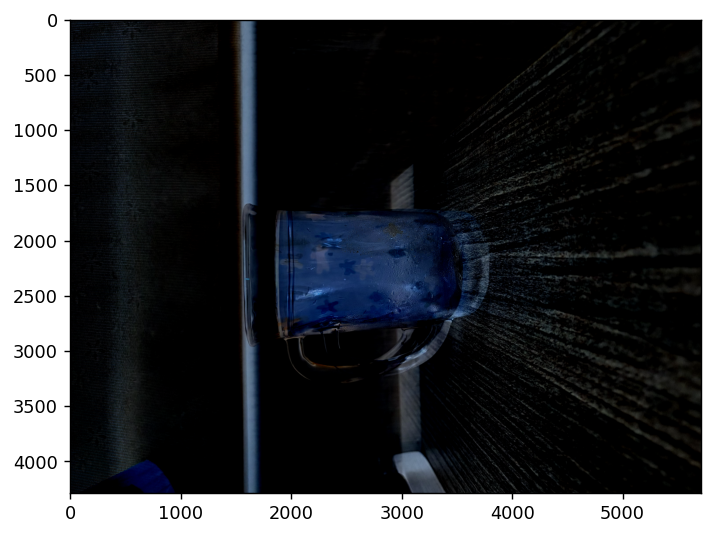

In [ ]:
plt.figure(dpi=128)
plt.imshow(img2-img1, cmap='gray')
plt.show()

## Scaling

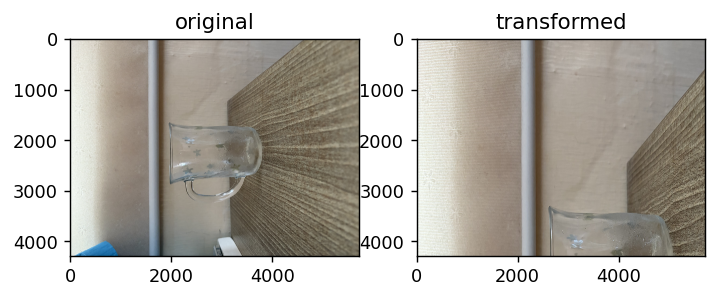

In [ ]:
sx = 0.5
sy = 0.75
S =np.array([
    [sx,0,0],
    [0,sy,0],
    [0,0,1]])

img2_moved = nd.affine_transform(img2,S)

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img2_moved, cmap='gray')
plt.title('transformed')
plt.show()

## Rotation

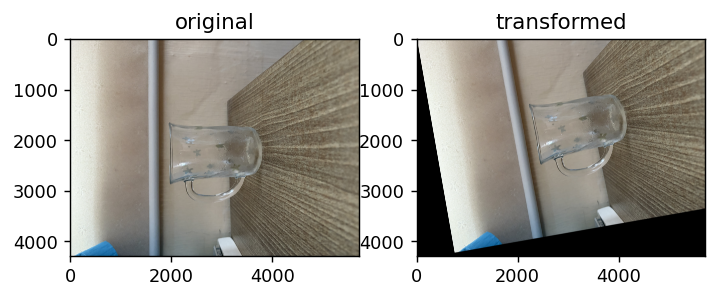

In [37]:
theta = -10*np.pi/180
R =np.array([
    [np.cos(theta),-np.sin(theta),0],
    [np.sin(theta),np.cos(theta),0],
    [0,0,1]])
img2_moved = nd.affine_transform(img2,R)

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img2_moved, cmap='gray')
plt.title('transformed')
plt.show()

## Translation

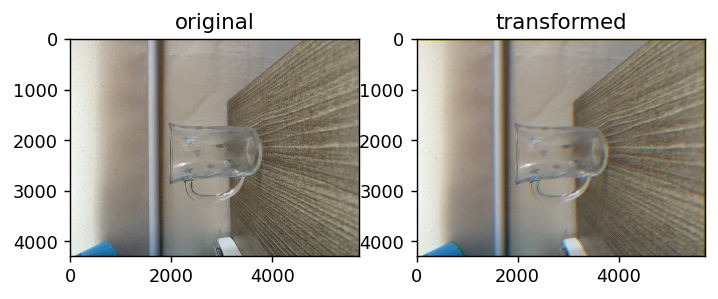

In [38]:
tx = -15
ty = 25
T =np.array([
    [1,0,tx],
    [0,1,ty],
    [0,0,1]])

img2_moved = nd.affine_transform(img2,T)

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img2_moved, cmap='gray')
plt.title('transformed')
plt.show()

## Shearing

In [ ]:
hx = .1
hy = 0
H =np.array([
    [1,hx,0],
    [hy,1,0],
    [0,0,1]])

img2_moved = nd.affine_transform(img2,H)

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img2_moved, cmap='gray')
plt.title('transformed')
plt.show()

## All together

In [ ]:
A = np.dot(np.dot(np.dot(H,T),R),S)
print(A)

img2_moved = nd.affine_transform(img2,A)

plt.figure(dpi=128)
plt.subplot(121)
plt.imshow(img2, cmap='gray')
plt.title('original')

plt.subplot(122)
plt.imshow(img2_moved, cmap='gray')
plt.title('transformed')
plt.show()

## Registration

In [ ]:
tx = 0
for ty in np.arange(0,12,2):
  T =np.array([
      [1,0,tx],
      [0,1,ty],
      [0,0,1]])

  img2_moved = nd.affine_transform(img2,T)

  print("ty=",ty)
  plt.figure(dpi=128)
  plt.subplot(121)
  plt.imshow(img2-img1, cmap='gray')
  plt.title('subtraction before reg.')

  plt.subplot(122)
  plt.imshow(img2_moved-img1, cmap='gray')
  plt.title('subtraction after reg.')
  plt.show()

## Exercise 1

- 본인이 직접 촬영한 같은 배경으로 변화를 관찰한 사진 두 장을 불러오고, affine transform을 활용한 registration을 통해 배경의 위치를 맞춘 후 subtraction을 진행하자.

## Exercise 2
- registration을 진행한 longitudinal medical image data를 불러오고, subtration image를 생성해보자.
- registration의 결과를 평가하고, subtraction image를 통한 분석을 통해 추가적으로 필요한 부분이 있을 지 고민하여 보자.

In [ ]:
import nibabel as nib

In [ ]:
day001 = nib.load('day001_reg.nii.gz').get_fdata()
day020 = nib.load('day020_reg.nii.gzz').get_fdata()
print(day001.shape,day020.shape)

In [ ]:
z = 38
plt.figure(dpi=128)
plt.subplot(131)
plt.imshow(day01[50:-50,50:-50,z].transpose(),cmap='gray',vmin=-1200,vmax=200)
plt.axis('off')
plt.subplot(132)
plt.imshow(day56[50:-50,50:-50,z].transpose(),cmap='gray',vmin=-1200,vmax=200)
plt.axis('off')
plt.subplot(133)
plt.imshow(day01[50:-50,50:-50,z].transpose()-day56[50:-50,50:-50,z].transpose(),cmap='gray',vmin=-350,vmax=350)
plt.axis('off')
plt.show()